## Датасеты мужской и женской обуви

In [13]:
import pandas as pd


df_male= pd.read_csv('7004_1.csv', on_bad_lines='skip' )
df_female = pd.read_csv('7003_1.csv', on_bad_lines='skip')



/tmp/ipykernel_213449/774591876.py:4: DtypeWarning:

Columns (20,21,25,29,30,36) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_213449/774591876.py:5: DtypeWarning:

Columns (25,36,39,44) have mixed types. Specify dtype option on import or set low_memory=False.



Тут я считаю среднюю цену за бренд, но как оказалось Puma входит в топ 15, затисавшись среди элитных брендов, такие как Луи Витон. Значит Puma обладает высоким качеством и хорошей продуманной стратегией ценообразования, это как айфон в мире элитных устройств. Не смотря на неспецефичный для элиты стиль Puma оказался достаточно высоким в цене

brand
1031                  44.510000
12 Step Gold          49.975000
14k co.              171.441944
180s                  25.440000
1883 by Wolverine    149.950000
                        ...    
unbranded             29.143333
under armour         167.490000
willtopinc            14.490000
wings + horns        380.000000
zagone studios       169.950000
Name: price, Length: 1950, dtype: float64


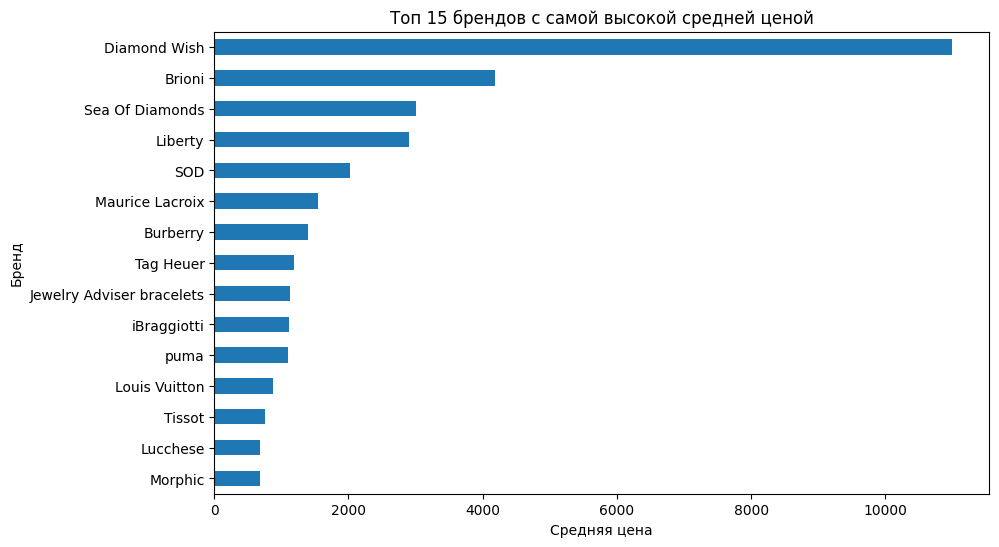

In [14]:
import matplotlib.pyplot as plt

df_male["price"] = df_male["prices.amountMin"]

# чистим данные, создаём только price
df_male["price"] = df_male["price"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)

# парсинг текст в float
df_male["price"] = pd.to_numeric(df_male["price"], errors="coerce")

# удаляем строки где цена не смогла распарситься в fgloat
df_male = df_male.dropna(subset=["price"])

# тут считаю среднюю цену групируя по брендам
avg_prices = df_male.groupby("brand")["price"].mean()

print(avg_prices)

# Строим интерактивный график средних цен (данных очень много)
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

fig = go.Figure([go.Bar(
    x=avg_prices.values,
    y=avg_prices.index,
    orientation='h'
)])
fig.update_layout(title='Средняя цена на бренд', xaxis_title='Средняя цена', yaxis_title='Бренд')
pyo.iplot(fig)


# тут топ 15
top15 = avg_prices.sort_values(ascending=False).head(15)

# Строим график
plt.figure(figsize=(10,6))
top15.plot(kind="barh")
plt.xlabel("Средняя цена")
plt.ylabel("Бренд")
plt.title("Топ 15 брендов с самой высокой средней ценой")
plt.gca().invert_yaxis()  # чтобы самый дорогой был сверху
plt.show()

Не смотря на высокую среднюю цену на обувь Puma, она все же не попадает в топ 15 брендов с самым широким распределением цен, значит Puma фокусируется на одном сегменте клиентов и теряет лидов среди других сегементов. 
Puma может попробовать себя в других стилях обуви, например классика, но это будет тяжело, так как присутствует барьер для выхода на рынок, а значит лучшим решением будет уйти в неоклассику, кэжуал, совместить две эпохи стиля, что принесёт ей больше клиентов из разных сегементов


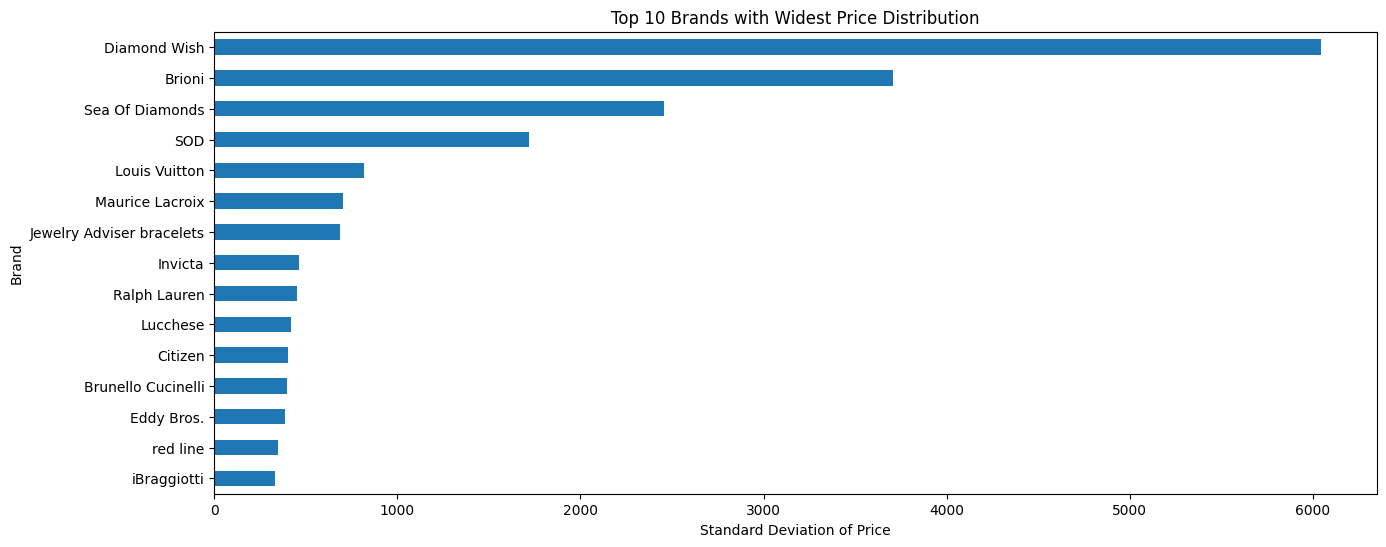

In [15]:
price_std = df_male.groupby('brand')['price'].std()

price_std_sorted = price_std.sort_values(ascending=False)
top15_price_std = price_std_sorted.head(15)


plt.figure(figsize=(15,6))
top15_price_std.plot(kind='barh')
plt.xlabel("Standard Deviation of Price")
plt.ylabel("Brand")
plt.title("Top 10 Brands with Widest Price Distribution")
plt.gca().invert_yaxis()

Проверим нормальное ли распределение среди цены между брендами? как итог нет, так как коэфицент распределния (Shapiro-Wilk Test) p явно меньше 0.05

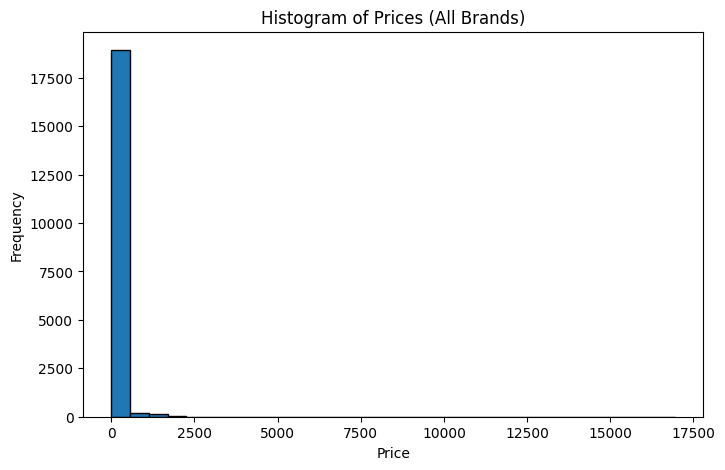

Stat=0.212, p=0.000
распределение НЕ нормальное


/home/alex/Desktop/data-analystis/male_female_shoe/venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19294.



In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_male['price'], bins=30, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices (All Brands)')
plt.show()


from scipy.stats import shapiro

prices = df_male['price']
stat, p = shapiro(prices)
print(f'Stat={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("распределение близко к нормальному")
else:
    print("распределение НЕ нормальное")





## Женская обувь

В результате анализа данных о распределении средней цены, я заметил, что разница между ценами среди брендов на женскую обувь более резкая, чем на мужское. Это позволяет сделать вывод о том, что статус и стиль прямо влияет на цену женской обуви, это значит, что в топ 15 брендов нет места универсальной обуве, как вслучае с Puma и все бренды имеет элитный статус, в отличие от мужской обуви

brand
1 World Sarongs     16.390000
180s                32.062000
2 Lips Too          38.611176
2Chillies           16.957500
301-42 SW-SM        24.000000
                      ...    
totes               42.536667
unbranded            7.590000
uniwigs            227.240000
vestal              51.945000
zeroUV              19.995000
Name: price, Length: 2141, dtype: float64


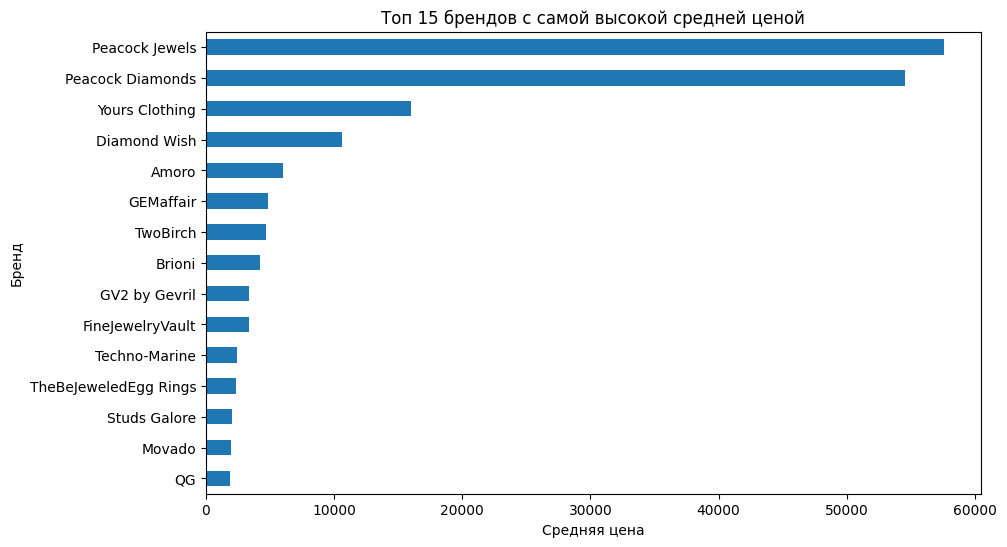

In [17]:
import matplotlib.pyplot as plt

df_female["price"] = df_female["prices.amountMin"]

# чистим данные, создаём только price
df_female["price"] = df_female["price"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)

# парсинг текст в float
df_female["price"] = pd.to_numeric(df_female["price"], errors="coerce")

# удаляем строки где цена не смогла распарситься в fgloat
df_female = df_female.dropna(subset=["price"])

# тут считаю среднюю цену групируя по брендам
avg_prices = df_female.groupby("brand")["price"].mean()

print(avg_prices)

# Строим интерактивный график средних цен (данных очень много)
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

fig = go.Figure([go.Bar(
    x=avg_prices.values,
    y=avg_prices.index,
    orientation='h'
)])
fig.update_layout(title='Средняя цена на бренд', xaxis_title='Средняя цена', yaxis_title='Бренд')
pyo.iplot(fig)


# тут топ 15
top15 = avg_prices.sort_values(ascending=False).head(15)

# Строим график
plt.figure(figsize=(10,6))
top15.plot(kind="barh")
plt.xlabel("Средняя цена")
plt.ylabel("Бренд")
plt.title("Топ 15 брендов с самой высокой средней ценой")
plt.gca().invert_yaxis()  # чтобы самый дорогой был сверху
plt.show()